In [5]:
import numpy as np

In [2]:
import seaborn as sns
import pandas as pd
import sklearn

In [4]:
df_train = pd.read_csv("HollywoodsMostProfitableStories.csv") #DataFrame Object
df_test = pd.read_csv("HollywoodsMostProfitableStories.csv")

In [ ]:
df_train.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [ ]:
#how many records in my data?
df_train.shape

(74, 8)

In [ ]:
#Get basic information about my data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [ ]:
df_train['Genre'].unique()

array(['Comedy', 'Drama', 'Romance', 'Animation', 'Action', 'Fantasy'],
      dtype=object)

In [ ]:
df_train.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


In [ ]:
df_train['Profitability'].value_counts()

5.343622    1
7.221796    1
1.783944    1
2.202571    1
1.365692    1
           ..
1.980206    1
2.639333    1
1.715263    1
6.636402    1
1.747542    1
Name: Profitability, Length: 71, dtype: int64

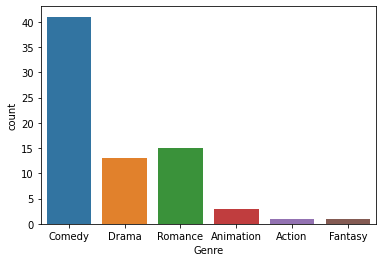

In [ ]:
#how genre?
sns.countplot(x='Genre', data=df_train)

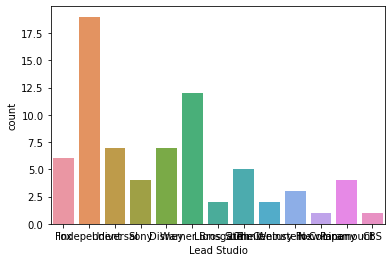

In [ ]:
#visualise the count of lead studio
sns.countplot(x=df_train['Lead Studio'])

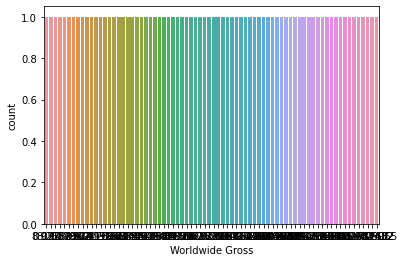

In [ ]:
sns.countplot(x=df_train['Worldwide Gross'])

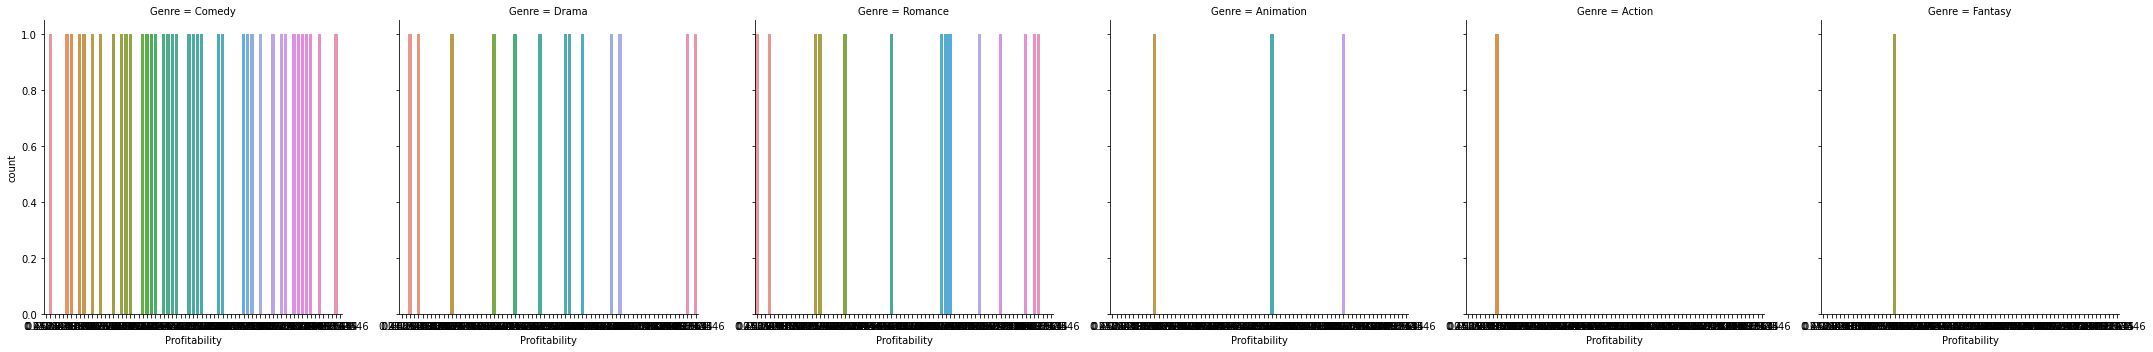

In [ ]:
sns.catplot(x='Profitability', col='Genre', kind='count',  data=df_train)

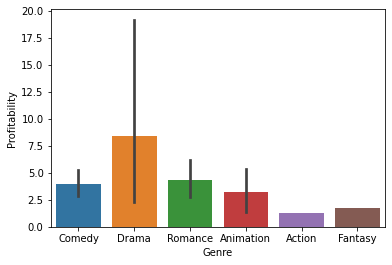

In [ ]:
#average profitability of each genre
sns.barplot(x='Genre',y='Profitability',data=df_train) #by default finds the mean age

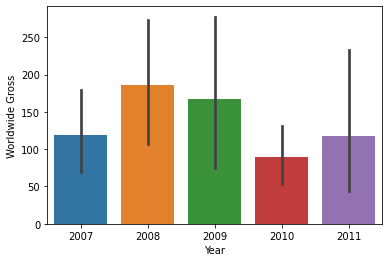

In [ ]:
sns.barplot(x='Year',y='Worldwide Gross',data=df_train)

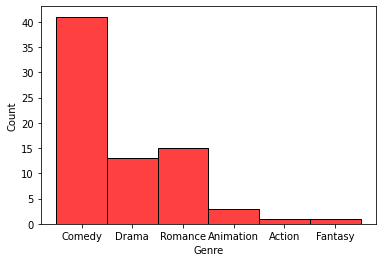

In [ ]:
sns.histplot(df_train['Genre'],color='red')

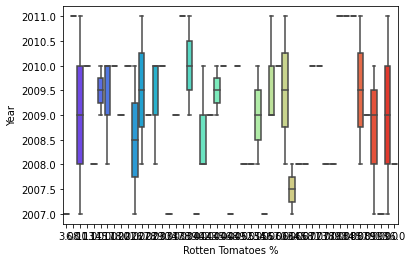

In [ ]:
sns.boxplot(x='Rotten Tomatoes %',y='Year',data=df_train,palette='rainbow')

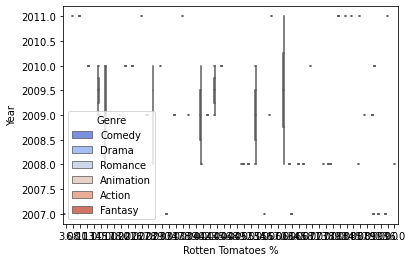

In [ ]:
sns.boxplot(x='Rotten Tomatoes %', y='Year', hue='Genre',data=df_train,palette='coolwarm')

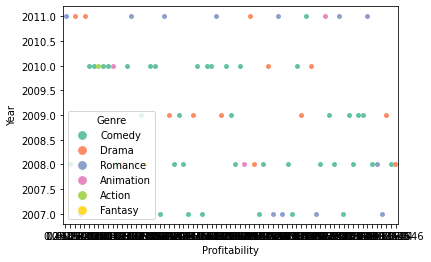

In [ ]:
sns.stripplot(x='Profitability',y='Year',hue='Genre',data=df_train,palette='Set2')

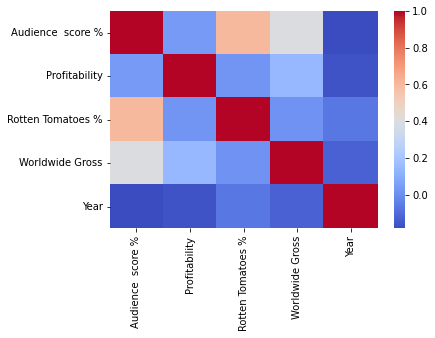

In [ ]:
sns.heatmap(df_train.corr(),cmap='coolwarm')

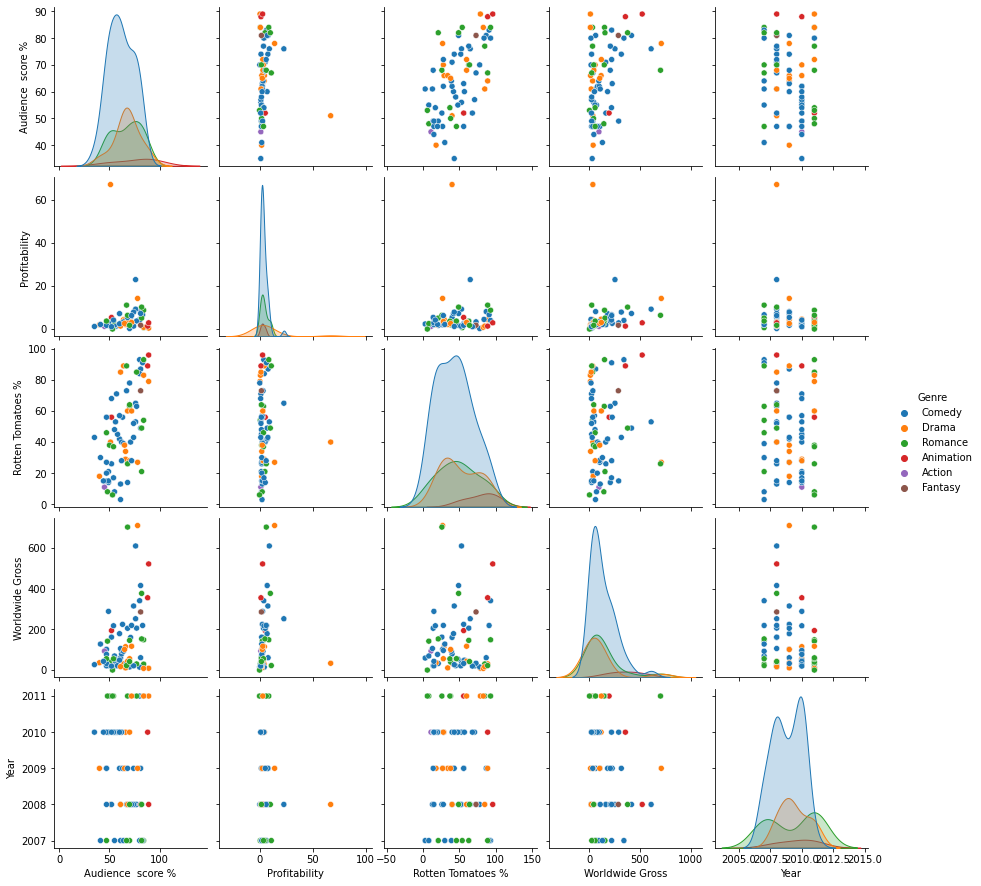

In [6]:
#view pairwise variable plots
sns.pairplot(df_train,hue='Genre')

In [9]:
#Step 2. Quick data cleaning and pre-processing

#1. Load the dataset
import pandas as pd

data = pd.read_csv("HollywoodsMostProfitableStories.csv")


In [10]:
#2. Inspect the Data
print(data.shape)   # to check number of rows and columns
print(data.head())  # to check the first few rows of the dataset


(74, 8)
                   Film    Genre  Lead Studio  Audience  score %  \
0            27 Dresses   Comedy          Fox               71.0   
1  (500) Days of Summer   Comedy          Fox               81.0   
2    A Dangerous Method    Drama  Independent               89.0   
3         A Serious Man    Drama    Universal               64.0   
4   Across the Universe  Romance  Independent               84.0   

   Profitability  Rotten Tomatoes %  Worldwide Gross  Year  
0       5.343622               40.0       160.308654  2008  
1       8.096000               87.0        60.720000  2009  
2       0.448645               79.0         8.972895  2011  
3       4.382857               89.0        30.680000  2009  
4       0.652603               54.0        29.367143  2007  


In [14]:
# 3.Remove Unnecessary Columns
data = data.drop(columns=['Audience  score %'])  # remove the 'Audience Score' column, as rotten tomatoes column already there


In [15]:
# 4. Handling missing data
data = data.dropna()   # remove any rows with missing data


In [18]:
#5. Convert data types
data['Year'] = pd.to_datetime(data['Year'])  # convert the 'Year' column to datetime
#Converting this column to a datetime object will allow us to perform time-based analysis, such as grouping the data by year or month, or calculating time differences between dates.
print(data.dtypes)



Film                         object
Genre                        object
Lead Studio                  object
Profitability               float64
Rotten Tomatoes %           float64
Worldwide Gross             float64
Year                 datetime64[ns]
dtype: object


In [19]:
# Normalize Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Profitability'] = scaler.fit_transform(data[['Profitability']])
